### Image of the plane to be measured

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Image of the plane
IMAGE_PATH = "./images/plano.jpeg"
file_name = IMAGE_PATH.rsplit("/", maxsplit=1)[-1]

img = cv2.imread(IMAGE_PATH)

dsize = (1000, 1000)

img = cv2.resize(img, dsize)

cv2.imshow('image', img)    
cv2.waitKey(0)
cv2.destroyAllWindows()


### Identification of the 10 known points in the plane which will be used to compute the homography in image coordinates


In [16]:
pts = []
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
        # cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
        cv2.imshow('image', img)
        
cv2.imshow('image', img)
cv2.setMouseCallback('image', mouse_callback)

while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
cv2.destroyAllWindows()

# Convert the points to a numpy array
pts = np.array(pts)

print(pts)

image_points = np.float32([tuple(pts[0]),tuple(pts[1]),tuple(pts[2]),tuple(pts[3]),tuple(pts[4]),tuple(pts[5]),tuple(pts[6]),tuple(pts[7]),tuple(pts[8]),tuple(pts[9])])


[[498 175]
 [473 252]
 [421 324]
 [649 265]
 [488 209]
 [450 223]
 [386 249]
 [559 224]
 [557 249]
 [514 287]]


### Definition of the 10 known points of the plane in real-life coordinates

In [17]:
# Define the source and destination points for the homography

# Some of the points were changed in order to detect the efficiency of using RANSAC or not
# 1 -> 10; 2 -> 9

real_point10 = np.array([[0], [0], [1]])  # This point is assumed to be the origin
real_point9 = np.array([[29], [32], [1]])
real_point3 = np.array([[47], [64], [1]])
real_point4 = np.array([[62], [0], [1]])
real_point5 = np.array([[13], [14], [1]])
real_point6 = np.array([[12], [29], [1]])
real_point7 = np.array([[11], [49], [1]])
real_point8 = np.array([[32], [5], [1]])
real_point2 = np.array([[42], [14], [1]])
real_point1 = np.array([[49], [35], [1]])

world_points = np.float32([tuple(real_point1),tuple(real_point2),tuple(real_point3),tuple(real_point4),tuple(real_point5),tuple(real_point6),tuple(real_point7),tuple(real_point8),tuple(real_point9),tuple(real_point10)])


### Computation of the homography with and without RANSAC and test of the accuracy of both

In [18]:

# Compute homography with RANSAC
H_ransac, H_mask = cv2.findHomography(image_points, world_points, cv2.RANSAC)

# Compute homography without RANSAC
H_no_ransac, mask= cv2.findHomography(image_points, world_points)

# Compare the homography matrices and their accuracy
print("Homography with RANSAC:\n", H_ransac)
print("Homography without RANSAC:\n", H_no_ransac)
print("Accuracy with RANSAC:\n", np.sum(H_mask) / H_mask.size)
print("Accuracy without RANSAC:\n", np.sum(mask) / mask.size)

Homography with RANSAC:
 [[ 2.49260558e-01  5.79122917e-01 -2.25186249e+02]
 [-2.83380219e-01  4.60346693e-01  6.20632113e+01]
 [ 2.93007298e-04  9.72016366e-04  1.00000000e+00]]
Homography without RANSAC:
 [[-4.07742778e+00  5.97812895e+00  6.49594495e+01]
 [-1.05957301e+00  7.71621449e+00 -1.62030318e+03]
 [-1.19686778e-01  1.72619615e-01  1.00000000e+00]]
Accuracy with RANSAC:
 0.6
Accuracy without RANSAC:
 1.0


### Choice of 2 points in order to find the distance between them in real-life coordinates using cv2's perspective transform

In [19]:
pts3 = []
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pts3.append((x, y))
        # cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
        cv2.imshow('image', img)
        
cv2.imshow('image', img)
cv2.setMouseCallback('image', mouse_callback)

while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
cv2.destroyAllWindows()
# Convert the points to a numpy array
pts2 = np.array(pts3)

print(pts2)

[[473 253]
 [423 324]]


### Calculation of the coordinates of the points chosen in real life coordinates and also the distance between them

In [20]:
# Define image coordinates of points whose real-world coordinates we want to compute

p1 = np.float32([tuple(pts2[0])])
p2 = np.float32([tuple(pts2[1])])

point1_3d = np.reshape(p1, (1, 1, 2))
point2_3d = np.reshape(p2, (1, 1, 2))

world_point1 = cv2.perspectiveTransform(point1_3d, H_ransac)
world_point2 = cv2.perspectiveTransform(point2_3d, H_ransac)

world_point3 = cv2.perspectiveTransform(point1_3d, H_no_ransac)
world_point4 = cv2.perspectiveTransform(point2_3d, H_no_ransac)

# Compute distance between the two points
distance = np.linalg.norm(world_point2 - world_point1)
distance2 = np.linalg.norm(world_point4 - world_point3)

# Print real-world coordinates and distance
print("Real-world coordinates of point 1 with RANSAC: ", world_point1)
print("Real-world coordinates of point 2 with RANSAC: ", world_point2)
print("Real-world coordinates of point 1 without RANSAC: ", world_point3)
print("Real-world coordinates of point 2 without RANSAC:: ", world_point4)

print("Distance between point 1 and point 2 with RANSAC:: ", distance)
print("Distance between point 1 and point 2  without RANSAC:: ", distance2)



Real-world coordinates of point 1 with RANSAC:  [[[28.336393 32.135555]]]
Real-world coordinates of point 2 with RANSAC:  [[[47.180454 63.4841  ]]]
Real-world coordinates of point 1 without RANSAC:  [[[29.415764 14.178555]]]
Real-world coordinates of point 2 without RANSAC::  [[[43.97879 68.48658]]]
Distance between point 1 and point 2 with RANSAC::  36.576355
Distance between point 1 and point 2  without RANSAC::  56.226715


### Plot of the distance and points calculated in the image

<function matplotlib.pyplot.show(close=None, block=None)>

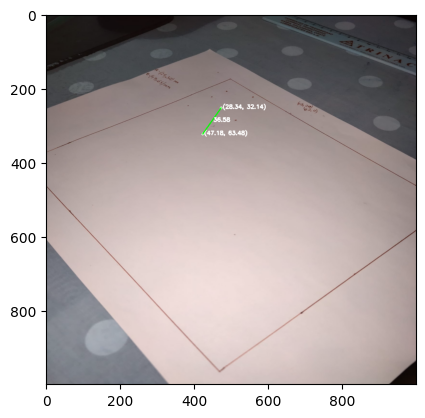

In [21]:

text_value_1 = round(tuple(world_point1[0][0])[0],2)
text_value_2 = round(tuple(world_point1[0][0])[1],2)

text_value_3 = round(tuple(world_point2[0][0])[0],2)
text_value_4 = round(tuple(world_point2[0][0])[1],2)
# Draw a circle at the point
radius = 2
color = (255, 255, 255) # red color in BGR format
thickness = 2 # filled circle
cv2.circle(img, pts3[0], radius, color, thickness)
cv2.circle(img, pts3[1], radius, color, thickness)

# Write the coordinates of the point on the image
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
text = f'({str(text_value_1)}, {str(text_value_2)})'
text_pos = (pts3[0][0] + 4, pts3[0][1] + 2) # offset the text position from the point
cv2.putText(img, text, text_pos, font, font_scale, color, thickness)

text2 = f'({str(text_value_3)}, {str(text_value_4)})'
text_pos2 = (pts3[1][0] + 4, pts3[1][1]+ 2) # offset the text position from the point
cv2.putText(img, text2, text_pos2, font, font_scale, color, thickness)

distance_str = format(distance, '.2f')
cv2.line(img, pts3[0], pts3[1], (0, 255, 0), thickness=2)
# Draw the text with the calculated distance
text_pos = (int((pts3[0][0] + pts3[1][0])/2) + 4, int((pts3[0][1] + pts3[1][1])/2)+2)
cv2.putText(img, distance_str, text_pos, font, font_scale, (255, 255, 255), thickness=2)

plt.imshow(img)
plt.show
